## Experiment 10
Calculate Ri with couples of attributes

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import deepmatcher as dm
from utilities_functions.intermediate_layer_extraction import return_layer_input_output
import torch
import pandas as pd

In [3]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
hybrid_model.load_state('models/hybrid2.pth')
hybrid_model.cuda()

MatchingModel(
  (attr_summarizers): ModuleMap(
    (Song_Name): Hybrid(
      (word_contextualizer): RNN(
        (rnn_groups): ModuleList(
          (0): GRU(300, 150, batch_first=True, bidirectional=True)
        )
        (dropouts): ModuleList(
          (0): Dropout(p=0)
        )
        (bypass_networks): ModuleList(
          (0): None
        )
        (input_dropout): NoMeta(
          (module): Dropout(p=0)
        )
      )
      (word_comparator): Attention(
        (alignment_networks): ModuleList(
          (0): AlignmentNetwork(
            (transform): Transform(
              (transforms): ModuleList(
                (0): Linear(in_features=300, out_features=300, bias=True)
                (1): Linear(in_features=300, out_features=300, bias=True)
              )
              (bypass_networks): ModuleList(
                (0): Bypass(
                  (highway_gate): Linear(in_features=300, out_features=300, bias=True)
                )
                (1): Bypass(


In [4]:
attributes = ['Song_Name','Artist_Name','Album_Name','Genre','Price','CopyRight','Time','Released']

In [5]:
attributes_sets = [['Artist_Name','Genre'],['Artist_Name','Song_Name'],['CopyRight','Genre'],['Artist_Name','Album_Name'],
                  ['Artist_Name','CopyRight'],['Genre','Released'],['Album_Name','Genre'],['Time','Album_Name']]

In [19]:
couples = ['Art-Gen', 'Art-Song', 'CR-Genr', 'Art-Alb', 'Art-CR','Gen-Rel','Alb-Gen','Tim-Alb']

In [20]:
flat_att_sets = []
for i,att_set in enumerate(attributes_sets):
    for att in att_set:
        flat_att_sets.append(att+str(i))

In [7]:
neg_classifier_inputs,neg_classifier_outputs,neg_ids = return_layer_input_output('sample_data/itunes-amazon/exp3'
                                                                         ,'negatives.csv',32,hybrid_model,
                                                                        hybrid_model.classifier)

In [8]:
pos_classifier_inputs,pos_classifier_outputs,pos_ids = return_layer_input_output('sample_data/itunes-amazon/exp3',
                                                                       'positives.csv',32,hybrid_model,
                                                                       hybrid_model.classifier)

In [9]:
negative_classifier_inputs = list(map(lambda x: x[0],neg_classifier_inputs))
positive_classifier_inputs = list(map(lambda x: x[0],pos_classifier_inputs))

In [10]:
from utilities_functions.ri_calculator import find_smallest_variation_to_change

In [11]:
attribute_lenght= len(attributes)

current_sample = 0
#each column of this matrix is related to a specific attribute
negatives_ri_matrix = []
for batch in negative_classifier_inputs:
    for index in range(len(batch)):
        current_sample_ris = []
        for attributes_set in attributes_sets:
            print('Processing sample {} on attributes {}'.format(current_sample,attributes_set))
            attribute_indexes = []
            for att in attributes_set:
                attribute_indexes.append(attributes.index(att))
            it,variation = find_smallest_variation_to_change(hybrid_model.classifier,1200,150,batch,index,
                                                             attribute_indexes,1)
            current_sample_ris.append(variation)
        negatives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample 0 on attributes ['Artist_Name', 'Genre']
Processing sample 0 on attributes ['Artist_Name', 'Song_Name']
Processing sample 0 on attributes ['CopyRight', 'Genre']
Processing sample 0 on attributes ['Artist_Name', 'Album_Name']
Processing sample 0 on attributes ['Artist_Name', 'CopyRight']
Processing sample 0 on attributes ['Genre', 'Released']
Processing sample 0 on attributes ['Album_Name', 'Genre']
Processing sample 0 on attributes ['Time', 'Album_Name']
Processing sample 1 on attributes ['Artist_Name', 'Genre']
Processing sample 1 on attributes ['Artist_Name', 'Song_Name']
Processing sample 1 on attributes ['CopyRight', 'Genre']
Processing sample 1 on attributes ['Artist_Name', 'Album_Name']
Processing sample 1 on attributes ['Artist_Name', 'CopyRight']
Processing sample 1 on attributes ['Genre', 'Released']
Processing sample 1 on attributes ['Album_Name', 'Genre']
Processing sample 1 on attributes ['Time', 'Album_Name']
Processing sample 2 on attributes ['Artist_Nam

Processing sample 17 on attributes ['Artist_Name', 'Song_Name']
Processing sample 17 on attributes ['CopyRight', 'Genre']
Processing sample 17 on attributes ['Artist_Name', 'Album_Name']
Processing sample 17 on attributes ['Artist_Name', 'CopyRight']
Processing sample 17 on attributes ['Genre', 'Released']
Processing sample 17 on attributes ['Album_Name', 'Genre']
Processing sample 17 on attributes ['Time', 'Album_Name']
Processing sample 18 on attributes ['Artist_Name', 'Genre']
Processing sample 18 on attributes ['Artist_Name', 'Song_Name']
Processing sample 18 on attributes ['CopyRight', 'Genre']
Processing sample 18 on attributes ['Artist_Name', 'Album_Name']
Processing sample 18 on attributes ['Artist_Name', 'CopyRight']
Processing sample 18 on attributes ['Genre', 'Released']
Processing sample 18 on attributes ['Album_Name', 'Genre']
Processing sample 18 on attributes ['Time', 'Album_Name']
Processing sample 19 on attributes ['Artist_Name', 'Genre']
Processing sample 19 on attrib

Processing sample 34 on attributes ['Artist_Name', 'Song_Name']
Processing sample 34 on attributes ['CopyRight', 'Genre']
Processing sample 34 on attributes ['Artist_Name', 'Album_Name']
Processing sample 34 on attributes ['Artist_Name', 'CopyRight']
Processing sample 34 on attributes ['Genre', 'Released']
Processing sample 34 on attributes ['Album_Name', 'Genre']
Processing sample 34 on attributes ['Time', 'Album_Name']
Processing sample 35 on attributes ['Artist_Name', 'Genre']
Processing sample 35 on attributes ['Artist_Name', 'Song_Name']
Processing sample 35 on attributes ['CopyRight', 'Genre']
Processing sample 35 on attributes ['Artist_Name', 'Album_Name']
Processing sample 35 on attributes ['Artist_Name', 'CopyRight']
Processing sample 35 on attributes ['Genre', 'Released']
Processing sample 35 on attributes ['Album_Name', 'Genre']
Processing sample 35 on attributes ['Time', 'Album_Name']
Processing sample 36 on attributes ['Artist_Name', 'Genre']
Processing sample 36 on attrib

Processing sample 51 on attributes ['Artist_Name', 'Song_Name']
Processing sample 51 on attributes ['CopyRight', 'Genre']
Processing sample 51 on attributes ['Artist_Name', 'Album_Name']
Processing sample 51 on attributes ['Artist_Name', 'CopyRight']
Processing sample 51 on attributes ['Genre', 'Released']
Processing sample 51 on attributes ['Album_Name', 'Genre']
Processing sample 51 on attributes ['Time', 'Album_Name']
Processing sample 52 on attributes ['Artist_Name', 'Genre']
Processing sample 52 on attributes ['Artist_Name', 'Song_Name']
Processing sample 52 on attributes ['CopyRight', 'Genre']
Processing sample 52 on attributes ['Artist_Name', 'Album_Name']
Processing sample 52 on attributes ['Artist_Name', 'CopyRight']
Processing sample 52 on attributes ['Genre', 'Released']
Processing sample 52 on attributes ['Album_Name', 'Genre']
Processing sample 52 on attributes ['Time', 'Album_Name']
Processing sample 53 on attributes ['Artist_Name', 'Genre']
Processing sample 53 on attrib

Processing sample 69 on attributes ['Artist_Name', 'Song_Name']
Processing sample 69 on attributes ['CopyRight', 'Genre']
Processing sample 69 on attributes ['Artist_Name', 'Album_Name']
Processing sample 69 on attributes ['Artist_Name', 'CopyRight']
Processing sample 69 on attributes ['Genre', 'Released']
Processing sample 69 on attributes ['Album_Name', 'Genre']
Processing sample 69 on attributes ['Time', 'Album_Name']
Processing sample 70 on attributes ['Artist_Name', 'Genre']
Processing sample 70 on attributes ['Artist_Name', 'Song_Name']
Processing sample 70 on attributes ['CopyRight', 'Genre']
Processing sample 70 on attributes ['Artist_Name', 'Album_Name']
Processing sample 70 on attributes ['Artist_Name', 'CopyRight']
Processing sample 70 on attributes ['Genre', 'Released']
Processing sample 70 on attributes ['Album_Name', 'Genre']
Processing sample 70 on attributes ['Time', 'Album_Name']
Processing sample 71 on attributes ['Artist_Name', 'Genre']
Processing sample 71 on attrib

Processing sample 86 on attributes ['Artist_Name', 'Song_Name']
Processing sample 86 on attributes ['CopyRight', 'Genre']
Processing sample 86 on attributes ['Artist_Name', 'Album_Name']
Processing sample 86 on attributes ['Artist_Name', 'CopyRight']
Processing sample 86 on attributes ['Genre', 'Released']
Processing sample 86 on attributes ['Album_Name', 'Genre']
Processing sample 86 on attributes ['Time', 'Album_Name']
Processing sample 87 on attributes ['Artist_Name', 'Genre']
Processing sample 87 on attributes ['Artist_Name', 'Song_Name']
Processing sample 87 on attributes ['CopyRight', 'Genre']
Processing sample 87 on attributes ['Artist_Name', 'Album_Name']
Processing sample 87 on attributes ['Artist_Name', 'CopyRight']
Processing sample 87 on attributes ['Genre', 'Released']
Processing sample 87 on attributes ['Album_Name', 'Genre']
Processing sample 87 on attributes ['Time', 'Album_Name']
Processing sample 88 on attributes ['Artist_Name', 'Genre']
Processing sample 88 on attrib

Processing sample 104 on attributes ['Artist_Name', 'Song_Name']
Processing sample 104 on attributes ['CopyRight', 'Genre']
Processing sample 104 on attributes ['Artist_Name', 'Album_Name']
Processing sample 104 on attributes ['Artist_Name', 'CopyRight']
Processing sample 104 on attributes ['Genre', 'Released']
Processing sample 104 on attributes ['Album_Name', 'Genre']
Processing sample 104 on attributes ['Time', 'Album_Name']
Processing sample 105 on attributes ['Artist_Name', 'Genre']
Processing sample 105 on attributes ['Artist_Name', 'Song_Name']
Processing sample 105 on attributes ['CopyRight', 'Genre']
Processing sample 105 on attributes ['Artist_Name', 'Album_Name']
Processing sample 105 on attributes ['Artist_Name', 'CopyRight']
Processing sample 105 on attributes ['Genre', 'Released']
Processing sample 105 on attributes ['Album_Name', 'Genre']
Processing sample 105 on attributes ['Time', 'Album_Name']
Processing sample 106 on attributes ['Artist_Name', 'Genre']
Processing sam

Processing sample 120 on attributes ['Album_Name', 'Genre']
Processing sample 120 on attributes ['Time', 'Album_Name']
Processing sample 121 on attributes ['Artist_Name', 'Genre']
Processing sample 121 on attributes ['Artist_Name', 'Song_Name']
Processing sample 121 on attributes ['CopyRight', 'Genre']
Processing sample 121 on attributes ['Artist_Name', 'Album_Name']
Processing sample 121 on attributes ['Artist_Name', 'CopyRight']
Processing sample 121 on attributes ['Genre', 'Released']
Processing sample 121 on attributes ['Album_Name', 'Genre']
Processing sample 121 on attributes ['Time', 'Album_Name']
Processing sample 122 on attributes ['Artist_Name', 'Genre']
Processing sample 122 on attributes ['Artist_Name', 'Song_Name']
Processing sample 122 on attributes ['CopyRight', 'Genre']
Processing sample 122 on attributes ['Artist_Name', 'Album_Name']
Processing sample 122 on attributes ['Artist_Name', 'CopyRight']
Processing sample 122 on attributes ['Genre', 'Released']
Processing sam

KeyboardInterrupt: 

In [18]:
ri_norms_negative_samples = []
for ri_list in negatives_ri_matrix:
    ri_norms_negative_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))

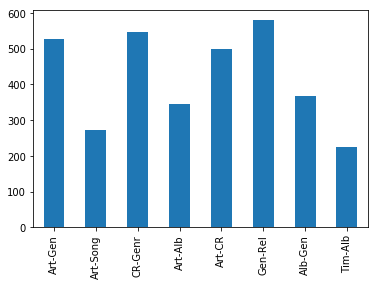

In [26]:
variation_df = pd.DataFrame(data = ri_norms_negative_samples,columns = couples)
sum_ri = variation_df.sum()
plt = sum_ri.plot
plt.bar()

In [14]:
def compute_norm(t,a1):
    s1 = attributes.index(a1)*150
    e1 = s1+150
    return torch.norm(t[s1:e1]).data[0]

In [98]:
ri_norms_neg_att = []
for ri_list in negatives_ri_matrix:
    ri_norms = []
    for ri,att_set in zip(ri_list,attributes_sets):
        n1 = compute_norm(ri,att_set[0])
        n2 = compute_norm(ri,att_set[1])
        ri_norms.append(n1)
        ri_norms.append(n2)
    ri_norms_neg_att.append(ri_norms)

In [101]:
variation_df = pd.DataFrame(data= ri_norms_neg_att,columns=flat_att_sets)
ri_sums_negatives = variation_df.sum()

In [102]:
variation_df.head()

,Artist_Name0,Genre0,Artist_Name1,Song_Name1,CopyRight2,Genre2,Artist_Name3,Album_Name3,Artist_Name4,CopyRight4,Genre5,Released5,Album_Name6,Genre6,Time7,Album_Name7
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.687442,1.430575,0.552344,1.138795,1.710487,1.703254,0.865233,1.326938,1.681457,1.431555,1.801424,1.708084,1.448483,0.800714,0.886574,0.616825
2,4.964851,4.485097,1.489537,2.295615,5.012259,4.304899,1.798295,2.409765,4.179017,4.346412,4.900689,5.064298,3.906814,2.404675,1.829746,1.462432
3,1.445535,1.194519,0.368142,0.871793,1.471903,1.467681,0.600059,1.048642,1.442163,1.195161,1.598261,1.466476,1.137639,0.537943,0.645767,0.436375
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [106]:
ri_sums_negatives.head()

Artist_Name0    1252.659556
Genre0          1129.716844
Artist_Name1     435.067229
Song_Name1       752.226888
CopyRight2      1300.405515
dtype: float64

In [ ]:
ri_sums_negatives.plot.bar()

In [12]:
attribute_lenght= len(attributes)

current_sample = 0
#each column of this matrix is related to a specific attribute
positives_ri_matrix = []
for batch in positive_classifier_inputs:
    for index in range(len(batch)):
        current_sample_ris = []
        for attributes_set in attributes_sets:
            print('Processing sample {} on attributes {}'.format(current_sample,attributes_set))
            attribute_indexes = []
            for att in attributes_set:
                attribute_indexes.append(attributes.index(att))
            it,variation = find_smallest_variation_to_change(hybrid_model.classifier,1200,150,batch,index,
                                                             attribute_indexes,0)
            current_sample_ris.append(variation)
        positives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample 0 on attributes ['Artist_Name', 'Genre']
Processing sample 0 on attributes ['Artist_Name', 'Song_Name']
Processing sample 0 on attributes ['CopyRight', 'Genre']
Processing sample 0 on attributes ['Artist_Name', 'Album_Name']
Processing sample 0 on attributes ['Artist_Name', 'CopyRight']
Processing sample 0 on attributes ['Genre', 'Released']
Processing sample 0 on attributes ['Album_Name', 'Genre']
Processing sample 0 on attributes ['Time', 'Album_Name']
Processing sample 1 on attributes ['Artist_Name', 'Genre']
Processing sample 1 on attributes ['Artist_Name', 'Song_Name']
Processing sample 1 on attributes ['CopyRight', 'Genre']
Processing sample 1 on attributes ['Artist_Name', 'Album_Name']
Processing sample 1 on attributes ['Artist_Name', 'CopyRight']
Processing sample 1 on attributes ['Genre', 'Released']
Processing sample 1 on attributes ['Album_Name', 'Genre']
Processing sample 1 on attributes ['Time', 'Album_Name']
Processing sample 2 on attributes ['Artist_Nam

Processing sample 17 on attributes ['Artist_Name', 'Song_Name']
Processing sample 17 on attributes ['CopyRight', 'Genre']
Processing sample 17 on attributes ['Artist_Name', 'Album_Name']
Processing sample 17 on attributes ['Artist_Name', 'CopyRight']
Processing sample 17 on attributes ['Genre', 'Released']
Processing sample 17 on attributes ['Album_Name', 'Genre']
Processing sample 17 on attributes ['Time', 'Album_Name']
Processing sample 18 on attributes ['Artist_Name', 'Genre']
Processing sample 18 on attributes ['Artist_Name', 'Song_Name']
Processing sample 18 on attributes ['CopyRight', 'Genre']
Processing sample 18 on attributes ['Artist_Name', 'Album_Name']
Processing sample 18 on attributes ['Artist_Name', 'CopyRight']
Processing sample 18 on attributes ['Genre', 'Released']
Processing sample 18 on attributes ['Album_Name', 'Genre']
Processing sample 18 on attributes ['Time', 'Album_Name']
Processing sample 19 on attributes ['Artist_Name', 'Genre']
Processing sample 19 on attrib

Processing sample 34 on attributes ['Artist_Name', 'Song_Name']
Processing sample 34 on attributes ['CopyRight', 'Genre']
Processing sample 34 on attributes ['Artist_Name', 'Album_Name']
Processing sample 34 on attributes ['Artist_Name', 'CopyRight']
Processing sample 34 on attributes ['Genre', 'Released']
Processing sample 34 on attributes ['Album_Name', 'Genre']
Processing sample 34 on attributes ['Time', 'Album_Name']
Processing sample 35 on attributes ['Artist_Name', 'Genre']
Processing sample 35 on attributes ['Artist_Name', 'Song_Name']
Processing sample 35 on attributes ['CopyRight', 'Genre']
Processing sample 35 on attributes ['Artist_Name', 'Album_Name']
Processing sample 35 on attributes ['Artist_Name', 'CopyRight']
Processing sample 35 on attributes ['Genre', 'Released']
Processing sample 35 on attributes ['Album_Name', 'Genre']
Processing sample 35 on attributes ['Time', 'Album_Name']
Processing sample 36 on attributes ['Artist_Name', 'Genre']
Processing sample 36 on attrib

Processing sample 51 on attributes ['Artist_Name', 'Song_Name']
Processing sample 51 on attributes ['CopyRight', 'Genre']
Processing sample 51 on attributes ['Artist_Name', 'Album_Name']
Processing sample 51 on attributes ['Artist_Name', 'CopyRight']
Processing sample 51 on attributes ['Genre', 'Released']
Processing sample 51 on attributes ['Album_Name', 'Genre']
Processing sample 51 on attributes ['Time', 'Album_Name']
Processing sample 52 on attributes ['Artist_Name', 'Genre']
Processing sample 52 on attributes ['Artist_Name', 'Song_Name']
Processing sample 52 on attributes ['CopyRight', 'Genre']
Processing sample 52 on attributes ['Artist_Name', 'Album_Name']
Processing sample 52 on attributes ['Artist_Name', 'CopyRight']
Processing sample 52 on attributes ['Genre', 'Released']
Processing sample 52 on attributes ['Album_Name', 'Genre']
Processing sample 52 on attributes ['Time', 'Album_Name']
Processing sample 53 on attributes ['Artist_Name', 'Genre']
Processing sample 53 on attrib

Processing sample 68 on attributes ['Artist_Name', 'Song_Name']
Processing sample 68 on attributes ['CopyRight', 'Genre']
Processing sample 68 on attributes ['Artist_Name', 'Album_Name']
Processing sample 68 on attributes ['Artist_Name', 'CopyRight']
Processing sample 68 on attributes ['Genre', 'Released']
Processing sample 68 on attributes ['Album_Name', 'Genre']
Processing sample 68 on attributes ['Time', 'Album_Name']
Processing sample 69 on attributes ['Artist_Name', 'Genre']
Processing sample 69 on attributes ['Artist_Name', 'Song_Name']
Processing sample 69 on attributes ['CopyRight', 'Genre']
Processing sample 69 on attributes ['Artist_Name', 'Album_Name']
Processing sample 69 on attributes ['Artist_Name', 'CopyRight']
Processing sample 69 on attributes ['Genre', 'Released']
Processing sample 69 on attributes ['Album_Name', 'Genre']
Processing sample 69 on attributes ['Time', 'Album_Name']
Processing sample 70 on attributes ['Artist_Name', 'Genre']
Processing sample 70 on attrib

Processing sample 85 on attributes ['Artist_Name', 'Song_Name']
Processing sample 85 on attributes ['CopyRight', 'Genre']
Processing sample 85 on attributes ['Artist_Name', 'Album_Name']
Processing sample 85 on attributes ['Artist_Name', 'CopyRight']
Processing sample 85 on attributes ['Genre', 'Released']
Processing sample 85 on attributes ['Album_Name', 'Genre']
Processing sample 85 on attributes ['Time', 'Album_Name']
Processing sample 86 on attributes ['Artist_Name', 'Genre']
Processing sample 86 on attributes ['Artist_Name', 'Song_Name']
Processing sample 86 on attributes ['CopyRight', 'Genre']
Processing sample 86 on attributes ['Artist_Name', 'Album_Name']
Processing sample 86 on attributes ['Artist_Name', 'CopyRight']
Processing sample 86 on attributes ['Genre', 'Released']
Processing sample 86 on attributes ['Album_Name', 'Genre']
Processing sample 86 on attributes ['Time', 'Album_Name']
Processing sample 87 on attributes ['Artist_Name', 'Genre']
Processing sample 87 on attrib

Processing sample 102 on attributes ['Artist_Name', 'Genre']
Processing sample 102 on attributes ['Artist_Name', 'Song_Name']
Processing sample 102 on attributes ['CopyRight', 'Genre']
Processing sample 102 on attributes ['Artist_Name', 'Album_Name']
Processing sample 102 on attributes ['Artist_Name', 'CopyRight']
Processing sample 102 on attributes ['Genre', 'Released']
Processing sample 102 on attributes ['Album_Name', 'Genre']
Processing sample 102 on attributes ['Time', 'Album_Name']
Processing sample 103 on attributes ['Artist_Name', 'Genre']
Processing sample 103 on attributes ['Artist_Name', 'Song_Name']
Processing sample 103 on attributes ['CopyRight', 'Genre']
Processing sample 103 on attributes ['Artist_Name', 'Album_Name']
Processing sample 103 on attributes ['Artist_Name', 'CopyRight']
Processing sample 103 on attributes ['Genre', 'Released']
Processing sample 103 on attributes ['Album_Name', 'Genre']
Processing sample 103 on attributes ['Time', 'Album_Name']
Processing sam

Processing sample 118 on attributes ['Genre', 'Released']
Processing sample 118 on attributes ['Album_Name', 'Genre']
Processing sample 118 on attributes ['Time', 'Album_Name']
Processing sample 119 on attributes ['Artist_Name', 'Genre']
Processing sample 119 on attributes ['Artist_Name', 'Song_Name']
Processing sample 119 on attributes ['CopyRight', 'Genre']
Processing sample 119 on attributes ['Artist_Name', 'Album_Name']
Processing sample 119 on attributes ['Artist_Name', 'CopyRight']
Processing sample 119 on attributes ['Genre', 'Released']
Processing sample 119 on attributes ['Album_Name', 'Genre']
Processing sample 119 on attributes ['Time', 'Album_Name']
Processing sample 120 on attributes ['Artist_Name', 'Genre']
Processing sample 120 on attributes ['Artist_Name', 'Song_Name']
Processing sample 120 on attributes ['CopyRight', 'Genre']
Processing sample 120 on attributes ['Artist_Name', 'Album_Name']
Processing sample 120 on attributes ['Artist_Name', 'CopyRight']
Processing sam

In [27]:
ri_norms_positive_samples = []
for ri_list in positives_ri_matrix:
    ri_norms_positive_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))

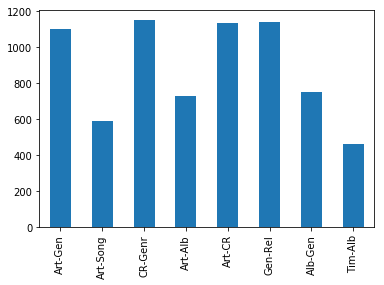

In [28]:
variation_pos_df = pd.DataFrame(data =ri_norms_positive_samples,columns = couples)
ri_sum_pos = variation_pos_df.sum()
ri_sum_pos.plot.bar()

In [15]:
ri_norms_pos_att = []
for ri_list in positives_ri_matrix:
    ri_norms = []
    for ri,att_set in zip(ri_list,attributes_sets):
        n1 = compute_norm(ri,att_set[0])
        n2 = compute_norm(ri,att_set[1])
        ri_norms.append(n1)
        ri_norms.append(n2)
    ri_norms_pos_att.append(ri_norms)

In [16]:
variation_att_df = pd.DataFrame(data= ri_norms_pos_att,columns=flat_att_sets)
ri_sums_positives = variation_att_df.sum()
variation_att_df.head()

,Artist_Name0,Genre0,Artist_Name1,Song_Name1,CopyRight2,Genre2,Artist_Name3,Album_Name3,Artist_Name4,CopyRight4,Genre5,Released5,Album_Name6,Genre6,Time7,Album_Name7
0,4.804485,4.371204,1.823596,3.519529,4.793094,4.786947,2.531153,3.943701,4.754462,4.338392,4.407969,4.804278,4.180389,2.424607,2.496805,1.622202
1,6.363946,5.998527,2.388361,4.618821,6.350795,6.641876,3.403495,5.268424,6.515992,5.884302,6.165504,6.391537,5.601894,3.322313,2.539327,1.716307
2,9.618322,9.903447,3.085716,5.912929,9.587428,10.230182,4.605813,8.061900,10.407465,10.037332,10.231603,9.432396,8.266118,4.690207,3.959229,3.551533
3,6.387103,6.243425,2.225648,4.464905,6.407913,7.028916,3.259164,5.219594,6.843912,6.054524,6.505485,6.415355,5.537310,3.238541,3.175421,2.149989
4,5.000427,4.365960,1.352374,3.092900,4.766950,5.811758,2.061626,3.665950,5.715718,4.121321,6.127147,4.789872,3.912939,1.902776,2.299443,1.794180


In [17]:
variation_att_df.to_csv('experiments-results/exp10/ri_pos_couples.csv')

In [ ]:
variation_df = pd.DataFrame(data= ri_norms_positive_samples,columns=['c1','c2','c3','c4','c5','c6'])

In [ ]:
ri_sums = variation_df.sum(numeric_only=True)
ri_sums.plot.bar()

## Ri histogram

In [3]:
variation_norm_negatives = pd.read_csv('experiments-results/exp10/ri_neg_couples.csv')
variation_norm_negatives.head()

,Artist_Name0,Genre0,Artist_Name1,Song_Name1,CopyRight2,Genre2,Artist_Name3,Album_Name3,Artist_Name4,CopyRight4,Genre5,Released5,Album_Name6,Genre6,Time7,Album_Name7
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.687442,1.430575,0.552344,1.138795,1.710487,1.703254,0.865233,1.326938,1.681457,1.431555,1.801424,1.708084,1.448483,0.800714,0.886574,0.616825
2,4.964851,4.485097,1.489537,2.295615,5.012259,4.304899,1.798295,2.409765,4.179017,4.346412,4.900689,5.064298,3.906814,2.404675,1.829746,1.462432
3,1.445535,1.194519,0.368142,0.871793,1.471903,1.467681,0.600059,1.048642,1.442163,1.195161,1.598261,1.466476,1.137639,0.537943,0.645767,0.436375
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
ri_sum = variation_norm_negatives.sum()
ri_sum_l = ri_sum.tolist()

In [25]:
columns = list(variation_norm_negatives)
columns

['Artist_Name0',
 'Genre0',
 'Artist_Name1',
 'Song_Name1',
 'CopyRight2',
 'Genre2',
 'Artist_Name3',
 'Album_Name3',
 'Artist_Name4',
 'CopyRight4',
 'Genre5',
 'Released5',
 'Album_Name6',
 'Genre6',
 'Time7',
 'Album_Name7']

In [23]:
l1 = []
l2 = []
for i,el in enumerate(ri_sum_l):
    if i%2 ==0 :
        l1.append(el)
    else:
        l2.append(el)

In [26]:
columns[0:7]

['Artist_Name0',
 'Genre0',
 'Artist_Name1',
 'Song_Name1',
 'CopyRight2',
 'Genre2',
 'Artist_Name3']

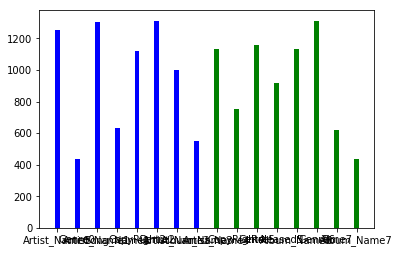

In [29]:
import numpy as np
import matplotlib.pyplot as plt

plt.bar(columns[0:8],l1, color = 'b', width = 0.25)
plt.bar(columns[8:],l2,color = 'g', width = 0.25)

plt.show()

In [18]:
X

array([0, 1, 2, 3])